#### Import Libraries

In [47]:
import pandas as pd
from utils import run_sumy, convert_summary, eval_sumy
import matplotlib.pyplot as plt
%matplotlib inline

#### Import Data

In [69]:
# train = pd.read_csv('train.txt')
dev = pd.read_csv('validate.txt')
test = pd.read_csv('test.txt')

In [4]:
# len(train)

4153

In [31]:
len(dev)

519

In [70]:
len(test)

520

In [5]:
dev.head()

,Congress,Number,Directory,ID,Subtype,Summary,Type,Version
0,115,SRES290,./data/115/bills/sres/sres290/text-versions/ats,115_SRES290_ATS,SRES,1,Simple Resolutions,ATS
1,115,HR2522,./data/115/bills/hr/hr2522/text-versions/ih,115_HR2522_IH,HR,1,Bills,IH
2,115,HR280,./data/115/bills/hr/hr280/text-versions/ih,115_HR280_IH,HR,1,Bills,IH
3,115,HR944,./data/115/bills/hr/hr944/text-versions/ih,115_HR944_IH,HR,1,Bills,IH
4,115,HR3141,./data/115/bills/hr/hr3141/text-versions/ih,115_HR3141_IH,HR,1,Bills,IH


#### Code to Run and Evaluate Sumy

In [3]:
NUM_SENTENCE = 4

In [6]:
in_dir = '../out3/'

In [7]:
def extra_clean(s):
    return s.strip().replace('``', '"').replace("''", '"').replace('-LRB-', '(').replace('-RRB-', ')')

In [29]:
def summarize_evaluate(row):
    bill_dict = {}
    bill = row.ID
    
    # get, clean, and save bill
    bill_path = in_dir + 'BILL_' + bill + '.out'
    with open(bill_path) as f:
        bill_text = f.readlines()
    clean_bill = ' '.join([extra_clean(i) for i in bill_text])
    bill_dict['bill_text'] = clean_bill
    
    # get, clean, and save CRS summary
    summ_path = in_dir + 'SUMMARY_' + bill + '.out'
    with open(summ_path) as f:
        summ_text = f.readlines()
    clean_summ = [extra_clean(i) for i in summ_text]
    bill_dict['CRS_summary'] = ' '.join(clean_summ)
        
    # create and save automatic summaries
    summary_KL = run_sumy(text = clean_bill, algo='KL', sent_count=NUM_SENTENCE)
    summary_KL_clean = ' '.join([str(sentence) for sentence in summary_KL])
    summary_LR = run_sumy(text = clean_bill, algo='LexRank', sent_count=NUM_SENTENCE)
    summary_LR_clean = ' '.join([str(sentence) for sentence in summary_LR])
    bill_dict['KL_summary'] = summary_KL_clean
    bill_dict['LR_summary'] = summary_LR_clean
    
    # evaluate automatic summaries
    CRS_sumy = convert_summary(clean_summ)
    rouge1_KL, rouge2_KL = eval_sumy(summary_KL, CRS_sumy)
    rouge1_LR, rouge2_LR = eval_sumy(summary_LR, CRS_sumy)
    bill_dict['KL_rouge1'] = rouge1_KL
    bill_dict['KL_rouge2'] = rouge2_KL
    bill_dict['LR_rouge1'] = rouge1_LR
    bill_dict['LR_rouge2'] = rouge2_LR
    
    return bill_dict

#### Sumy for Validate Set

In [38]:
# all_dicts = []
for i in range(len(dev)):
    print(i)
    curr_dict = summarize_evaluate(dev.iloc[i])
    all_dicts.append(curr_dict)

386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518


###### come back to index 385!!!!!

In [42]:
val_sumy_no386 = pd.DataFrame(all_dicts)

In [45]:
val_sumy_no386.head(3)

,CRS_summary,KL_rouge1,KL_rouge2,KL_summary,LR_rouge1,LR_rouge2,LR_summary,bill_text
0,This bill : ( 1 ) directs the Department of Ve...,0.400000,0.171429,SECTION 1 FREE AND COMPREHENSIVE MENTAL HEALTH...,0.566667,0.371429,"To amend title 38 , United States Code , to di...","To amend title 38 , United States Code , to di..."
1,Science Laureates of the United States Act of ...,0.250000,0.104651,SECTION 1 SHORT TITLE . ( 2 ) Scientific resea...,0.383333,0.162791,-- Congress finds the following : ( 1 ) Scient...,To establish a position of Science Laureate of...
2,"Recognizes that March 9 , 2017 , marks 10 year...",0.391304,0.212121,"Whereas , in November 2010 , the Levinson fami...",0.467391,0.280303,"Whereas , in December 2007 , Robert Levinson '...",Calling on the Government of Iran to fulfill r...


In [43]:
val_sumy_no386.to_csv('val_sumy_no386.csv')

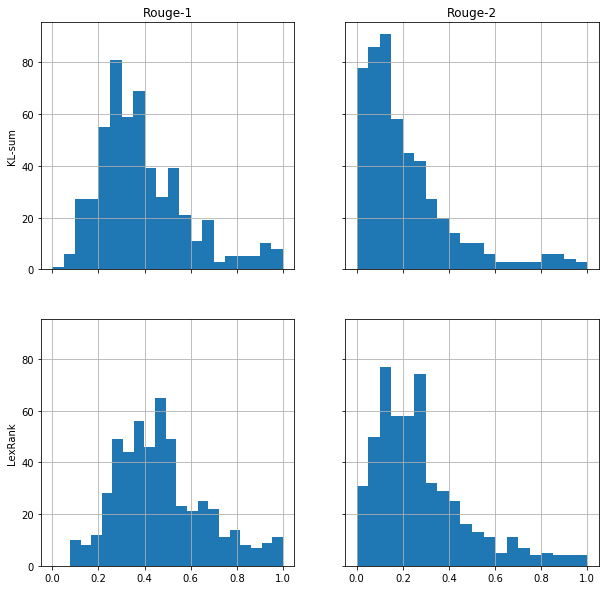

In [65]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
val_sumy_no386.KL_rouge1.hist(bins=20, ax=ax[0,0])
val_sumy_no386.KL_rouge2.hist(bins=20, ax=ax[0,1])
val_sumy_no386.LR_rouge1.hist(bins=20, ax=ax[1,0])
val_sumy_no386.LR_rouge2.hist(bins=20, ax=ax[1,1])
ax[0,0].set_ylabel('KL-sum')
ax[1,0].set_ylabel('LexRank')
ax[0,0].set_title('Rouge-1')
ax[0,1].set_title('Rouge-2')
plt.show()

In [66]:
val_sumy_no386.mean()

KL_rouge1    0.388620
KL_rouge2    0.216361
LR_rouge1    0.472046
LR_rouge2    0.278739
dtype: float64

In [67]:
val_sumy_no386.median()

KL_rouge1    0.352941
KL_rouge2    0.154016
LR_rouge1    0.450962
LR_rouge2    0.234680
dtype: float64

#### Sumy for Test Set

In [90]:
# all_dicts_test = []
for i in range(455, len(test)):
    print(i)
    curr_dict = summarize_evaluate(test.iloc[i])
    all_dicts_test.append(curr_dict)

455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519


In [88]:
# all_dicts_test.append({})

In [91]:
len(all_dicts_test)

520

###### COME BACK TO INDEX 0, 152, 303, 307, 454

In [92]:
test_sumy_missing = pd.DataFrame(all_dicts_test)

In [94]:
test_sumy_missing.head(3)

,CRS_summary,KL_rouge1,KL_rouge2,KL_summary,LR_rouge1,LR_rouge2,LR_summary,bill_text
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,High-Skilled Integrity and Fairness Act of 201...,0.356589,0.085859,( 2 ) The prevailing wage level required to be...,0.379845,0.09596,", the following rules shall apply : ( A ) For ...",To amend the Immigration and Nationality Act t...
2,Expresses the sense of Congress that the natio...,0.291667,0.040000,Whereas Federal public lands provide diverse o...,0.291667,0.08000,Whereas our current Federal public lands are a...,Expressing the sense of Congress that America ...


In [95]:
test_sumy_missing.to_csv('test_sumy_missing.csv')

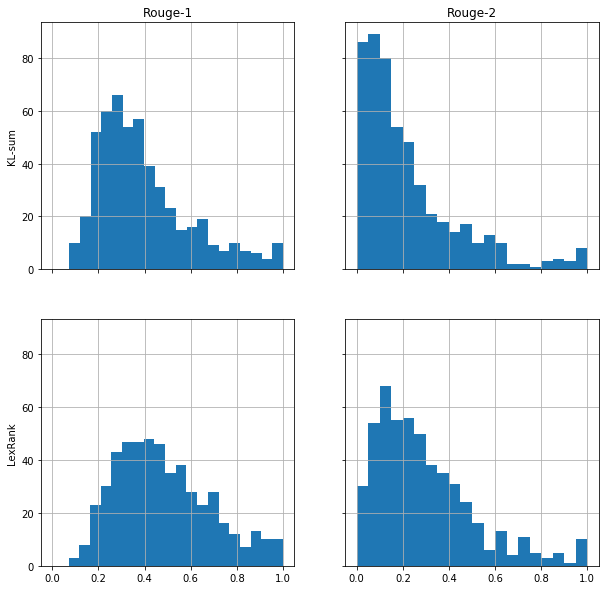

In [96]:
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
test_sumy_missing.KL_rouge1.hist(bins=20, ax=ax[0,0])
test_sumy_missing.KL_rouge2.hist(bins=20, ax=ax[0,1])
test_sumy_missing.LR_rouge1.hist(bins=20, ax=ax[1,0])
test_sumy_missing.LR_rouge2.hist(bins=20, ax=ax[1,1])
ax[0,0].set_ylabel('KL-sum')
ax[1,0].set_ylabel('LexRank')
ax[0,0].set_title('Rouge-1')
ax[0,1].set_title('Rouge-2')
plt.show()

In [98]:
test_sumy_missing.mean()

KL_rouge1    0.393818
KL_rouge2    0.222456
LR_rouge1    0.480828
LR_rouge2    0.292521
dtype: float64

In [99]:
test_sumy_missing.median()

KL_rouge1    0.346939
KL_rouge2    0.153846
LR_rouge1    0.448276
LR_rouge2    0.241379
dtype: float64